# Regular expression workflow: Interrogative

An example of regex analysis that we can perform on a text is the identification of interrogative sentences in the PDF. As stated, we will consider only direct interrogative sentences, that is, sentences that end with a “?”.

First we import the pdf and the libraries we are going to use (for more detailed instruction consult the notebook [from_pdf_to_wordclouds_workflow](./from_pdf_to_wordclouds_workflow.ipynb)

In [4]:
!pip install PyMuPDF


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import fitz  # PyMuPDF module

In [8]:
import urllib.request
from pathlib import Path

# Step 1: Create a ./data folder if it doesn’t exist
data_folder = Path("./data/")
data_folder.mkdir(exist_ok=True)

# Step 2: Load the text file (in this case we upload the text directly form the Folger Shakespeare library website)
text_address = "https://folger-main-site-assets.s3.amazonaws.com/uploads/2022/11/othello_PDF_FolgerShakespeare.pdf"
text_name = './data/' + text_address.rsplit('/', 1)[-1]
urllib.request.urlretrieve(text_address, text_name)

#Step 3: creating a file object and opening the PDF
from pathlib import Path
pdf_path = Path(text_name)  

doc = fitz.open(pdf_path) # open the PDF

#Step 4: creating an empty variable that contains the full text to analyze

full_text = "" 

for i, page in enumerate(doc): 
    text = page.get_text()  
    if text:  
        full_text += text + "\n" 

The basic idea is to divide the text (full_text) into sentences based on punctuation (namely “.”, “!”, and “?”), and then create a variable called frasi_interrogative containing only those sentences that end with a “?”. For a review of this technique, you can refer to the dedicated notebook on [regular expressions](./regular-expressions.ipynb)

In [9]:
import re

In [10]:
# 3. Extract the text

full_text = "" 
for i, page in enumerate(doc):
    text = page.get_text()  
    if text: 
        full_text += text + "\n"  

`re.findall(r'[^.?!“”"—]+\?', full_text)`: `findall(..)` is a function that returns a list of all substrings that match a given pattern.

In this case, the pattern is defined as `[^.?!“”"—]` and allows us to capture all characters up to a period, exclamation point, or question mark, without including them. Since the goal is to identify only interrogative sentences, the pattern includes `\?` at the end. This causes the regex to capture exclusively those sequences of text that end with a question mark, ignoring all other sentences. The result is therefore a list containing only the interrogative sentences in the text.

To count the **number of interrogative sentences** in the text, it is sufficient to calculate the **length of the list** of interrogative sentences (using the `len()` function).

In [21]:
interrogative_sen = re.findall(r'[^.?!“”"—]+\?', full_text)

To check, we can print the first 10 result of the list:

In [22]:
for q in interrogative_sen[:10]:
    print("-", q.strip())

- What is the difference?
- Who hath relieved/you?
- And what was he?
- What is the reason of this terrible summons?
- What is the matter there?
- Signior, is all your family within?
- Are your doors locked?
- Why, wherefore ask you this?
- What, have you lost your wits?
- Most reverend signior, do you know my voice?


## Keywords
Another possible analysis consists of determining how many of these sentences contain specific keywords. To do this, a Python dictionary called counts is used, in which each key represents a word or a group of keywords (“jealousy”, “love”, “white”, “moor”), and the associated value indicates how many times that word appears in the interrogative sentences. 
At the beginning, all values are set to zero, since no counting has been performed yet.

In [23]:
all_sentences = re.split(r'[.?!]\s*', full_text) 

In [24]:
counts = {
    "jealousy": 0,
    "love": 0,
    "white": 0,
    "moor": 0
}

Each sentence in the list is then processed, and to simplify the search, the sentence is converted to lowercase. This allows the keywords to be recognized regardless of whether they are written in uppercase or lowercase. 

For each sentence, a regex is used to check whether it contains one of the keywords. For example, to count how many times “love” appears, the regex `\blove\b` searches for the word as a separate element and, if it is present, increments the corresponding value in the dictionary by 1.

At the end of this process, the counts dictionary will contain the number of sentences in which each keyword appears, thus providing a clear overview of the **frequency of keyword-based sentences in the text**.

In [25]:
for sen in all_sentences:
    sen_lower = sen.lower()
    
    if re.search(r'\bjealous(y)?\b', sen_lower):
        counts["jealousy"] += 1
    
    if re.search(r'\blove\b', sen_lower):
        counts["love"] += 1
    
    if re.search(r'\bwhite\b', sen_lower):
        counts["white"] += 1
    
    if re.search(r'\bmoor\b', sen_lower):
        counts["moor"] += 1

### Results visualization

We can show the results through different visualization charts:

In [31]:
print("Results:")
print(f"- Total Interrogative: {len(interrogative_sen)}")
print(f"- containing Jealousy: {counts['jealousy']}")
print(f"- containing Love: {counts['love']}")
print(f"- containing White: {counts['white']}")
print(f"- containing Moor: {counts['moor']}")

Results:
- Total Interrogative: 501
- containing Jealousy: 19
- containing Love: 79
- containing White: 2
- containing Moor: 56


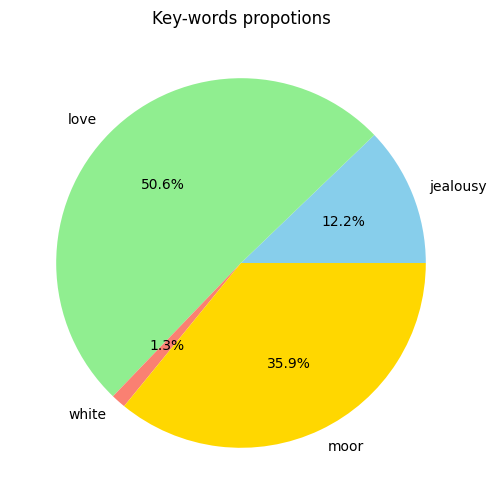

In [32]:
import matplotlib.pyplot as plt #import chart library

key_words = list(counts.keys()) #key words dictionary
key_words_count = list(counts.values()) 

# Chart 1: pie chart

plt.figure(figsize=(6,6))
plt.pie(valori, labels=categorie, autopct="%1.1f%%", colors=['skyblue','lightgreen','salmon','gold'])
plt.title("Key-words propotions")
plt.show()

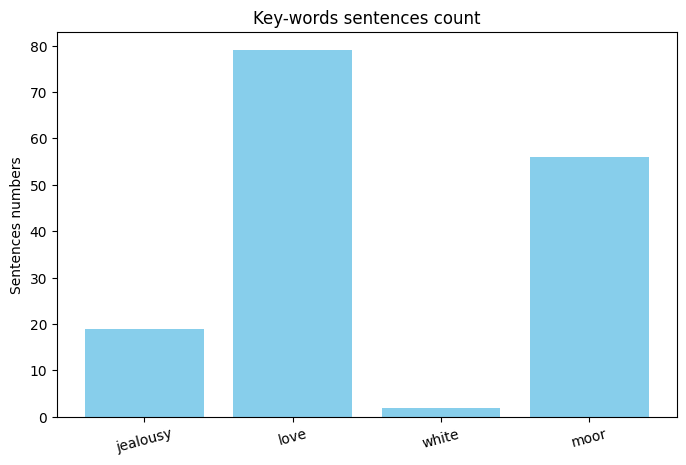

In [33]:
# Chart 2: columns

plt.figure(figsize=(8,5))
plt.bar(categorie, valori, color='skyblue')
plt.title("Key-words sentences count")
plt.ylabel("Sentences numbers")
plt.xticks(rotation=15)  
plt.show()